# Reporte 1:

Alumna: Angela Rodriguez Fernandez
Código: 20200748

In [1]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
from sympy import *
import pandas as pd
#from causalgraphicalmodels import CausalGraphicalModel

## Parte 1: Código

## 1. Función de Demanda de Consumo

La función de Consumo es: $$ C = C_0 + bYd$$

También entendida como: $$C = C_0 + b(1-t)Y$$

En esta función se representa como parte del ingreso se utiliza en los gastos de consumo. El consumo fijo (C_0) representa al consumo autónomo y la b representa a la propesión marginal a consumir. Y el Yd representa el ingreso disponible. En este sentido, la función se enfoca primordialmente en como el consumo depende del ingreso real disponible y de acuerda a esta podemos ver como se distribuye en gastos fijos y variables.

In [2]:
# Parámetros

Y_size = 100 

Co = 35
b = 0.8
t = 0.3

Y = np.arange(Y_size)

# Ecuación de la curva del ingreso de equilibrio

def C(Co, b, t, Y):
    C = Co + b*(1-t)*Y
    return C

C = C(Co, b, t, Y)

In [3]:
# Gráfico

# Dimensiones del gráfico
y_max = np.max(Y)
fig, ax = plt.subplots(figsize=(10, 8))

custom_xlim = (0, 130)
custom_ylim = (20, 130)

plt.setp(ax, xlim=custom_xlim, ylim=custom_ylim)


# Curvas a graficar
ax.plot(Y, C, label = "Consumo", color = "#29d491") #Demanda agregada

# Eliminar las cantidades de los ejes
ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Texto agregado
    # punto de equilibrio
plt.text(80, 95, '$PMgC = △C/△Y^d = b = 0.5$', fontsize = 13, color = 'black')


# Título y leyenda
ax.set(title="Función de demanda de Consumo", xlabel= '$Y^d$', ylabel= 'C')
ax.legend() #mostrar leyenda

plt.show()

## 2. Función de Demanda de Inversión

La función es: $$ I = I_0 - hr$$

En esta función se encuentra a la inversión autónoma (Io) como valor fijo, y el h que que representa la sensibilidad (0-1) que tienen los inversionistas ante la subida o bajada de la tasa de interés (r). En este sentido, la función nos permite entender como los gastos de inversión aumenta el stock de la economía, provenientes de los empresarios, y como las expectativas y especulaciones afectan el desarrollo y producción de la economía.

In [4]:
# Parámetros

Io = 40
h = 0.7

r = np.arange(start = 0.01, stop = 1, step =0.01)  
r

# Ecuación de la curva del ingreso de equilibrio

def I(Io, h, r):
    I = Io - h*r
    return I

I = I(Io, h, r)

In [5]:
# Gráfico

# Dimensiones del gráfico
y_max = np.max(r)
fig, ax = plt.subplots(figsize=(10, 8))

custom_xlim = (0.1, 1.25)
custom_ylim = (39.1, 40.2)

plt.setp(ax, xlim=custom_xlim, ylim=custom_ylim)


# Curvas a graficar
ax.plot(r, I, label = "Inversión", color = "#d43c29") #Demanda agregada

# Texto agregado
    # punto de equilibrio
plt.text(0.8, 39.5, '$I = Io - hr$', fontsize = 12.5, color = 'black')


# Título y leyenda
ax.set(title="Función de demanda de Inversión", xlabel= 'r', ylabel= 'I')
ax.legend() #mostrar leyenda

plt.show()

## 3. ¿Cuáles son los supuestos del modelo Ingreso-Gasto Keynesiano?

Son 4: el nivel de precios es fijo, el nivel de producto se adapta a los cambios en la demanda agregada, la tasa de interés está determinada fuera del modelo y el modelo es de corto plazo (Jiménez 2020, pp. 52). 

## 4. Encuentra el nivel de Ingreso de Equilibrio

La ecuación de equilibrio para el Ingreso Agregado (Ye) se deriva de la condición de equilibrio donde el ingreso es igual a la demanda agregada: $DA = Y$. Sabemos que:

$$ DA = C + I + G + X - M $$

Donde:

$$ C = C_0 + bY^d $$
$$ I = I_0 - hr $$
$$ G = G_0 $$
$$ X = X_0 $$
$$ M = mY^d $$

$$ Y^d = 1 - t $$

Entonces: 

$$ DA = C_0 + I_0 + G_0 + X_0 - hr + Y(b - m)(1 - t) $$

De forma corta:

$$ DA = α_0 + α_1Y $$

Donde $ α_0 = (C_0 + I_0 + G_0 + X_0 -hr)$ es el intercepto y $ α_1 = (b - m)(1 - t) $ es la pendiente de la función

Ahora, considerando la condición de equilibrio $Y = DA$, la ecuación del ingreso de equilibrio es:

$$ Y = C_0 + bY^d + I_0 -hr + G_0 + X_0 - mY^d $$

$$ Y = \frac{1}{1 - (b - m)(1 - t)} (C_0 + I_0 + G_0 + X_0 - hr) $$

In [6]:
# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 70
Xo = 2
h = 0.7
b = 0.8 # b > m
m = 0.2
t = 0.3
r = 0.9

Y = np.arange(Y_size)

# Ecuación de la curva del ingreso de equilibrio

def DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y):
    DA_K = (Co + Io + Go + Xo - h*r) + ((b - m)*(1 - t)*Y)
    return DA_K

DA_IS_K = DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y)

In [7]:
# Recta de 45°

a = 2.5 

def L_45(a, Y):
    L_45 = a*Y
    return L_45

L_45 = L_45(a, Y)

In [8]:
# Gráfico

# Dimensiones del gráfico
y_max = np.max(DA_IS_K)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(DA_IS_K, label = "DA", color = "#d4296c") #Demanda agregada
ax.plot(L_45, color = "#404040") #Línea de 45º

# Eliminar las cantidades de los ejes
ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Líneas punteadas punto de equilibrio
plt.axvline(x=70.5,  ymin= 0, ymax= 0.69, linestyle = ":", color = "grey")
plt.axhline(y=176, xmin= 0, xmax= 0.7, linestyle = ":", color = "grey")

plt.axvline(x=70.5,  ymin= 0, ymax= 0.69, linestyle = ":", color = "grey")
plt.axhline(y=145, xmin= 0, xmax= 1, linestyle = ":", color = "grey")

# Texto agregado
    # punto de equilibrio
plt.text(0, 180, '$DA^e$', fontsize = 11.5, color = 'black')
plt.text(72, 0, '$Y^e$', fontsize = 12, color = 'black')
plt.text(0, 152, '$α_o$', fontsize = 15, color = 'black')
    # línea 45º
plt.text(6, 4, '$45°$', fontsize = 11.5, color = 'black')
plt.text(2.5, -3, '$◝$', fontsize = 30, color = '#404040')
    # ecuaciones
plt.text(87, 203, '$DA = α_0 + α_1 Y$', fontsize = 11.5, color = '#d4296c')
plt.text(80, 165, '$α_1 = (b-m)(1-t)$', fontsize = 11.5, color = 'black')
plt.text(73, 125, '$α_0 = C_o + I_o + G_o + X_o - hr$', fontsize = 11.5, color = 'black')

plt.text(92, 192, '$↓$', fontsize = 13, color = 'black')
plt.text(85, 135, '$↑$', fontsize = 13, color = 'black')

# Título y leyenda
ax.set(title="El ingreso de Equilibrio a Corto Plazo", xlabel= r'Y', ylabel= r'DA')
ax.legend() #mostrar leyenda

plt.show()

## 5. Estática Comparativa en el modelo de Ingreso-Gasto Keynesino

### 5.1 Política Fiscal Expansiva con aumento del Gasto del Gobierno

### Intuicion: 

$$ Go↑ → DA↑ → DA > Y → Y↑ $$

Se entiende de que si hay una aumento del gasto púlibco esto supondrá un aumento de la Demanda Agregada (DA). Esto generará que  la DA sera mayor al nivel de equilibrio. Por eso, para volver al equilibrio, el nivel de producción tendrá que aumentar. En este sentido, el aumento del gasto público genera un crecimiento en el nivel de producción

### Matemáticamente: $∆Go > 0  →  ¿∆Y?$

Sabiendo que: 

$$ Y = \frac{1}{1 - (b - m)(1 - t)} (C_0 + I_0 + G_0 + X_0 - hr) $$

o, considerando el multiplicador keynesiano, $ k > 0 $:

$$ Y = k (C_0 + I_0 + G_0 + X_0 - hr) $$


$$ ∆Y = k (∆C_0 + ∆I_0 + ∆G_0 + ∆X_0 - ∆hr) $$

Pero, si no ha habido cambios en $C_0$, $I_0$, $X_0$, $h$ ni $r$, entonces: 

$$∆C_0 = ∆I_0 = ∆X_0 = ∆h = ∆r = 0$$

$$ ∆Y = k (∆G_0) $$

Sabiendo que $∆G_0 > 0 $ y que $k > 0$, la multiplicación de un número psitivo con un positivo dará otro positivo:

$$ ∆Y = (+)(+) $$
$$ ∆Y > 0 $$

### Gráfico

In [9]:
#--------------------------------------------------
# Curva  ORIGINAL

    # Parámetros
Y_size = 100 

Co = 35
Io = 40
Go = 70
Xo = 2
h = 0.7
b = 0.8
m = 0.2
t = 0.3
r = 0.9

Y = np.arange(Y_size)

    # Ecuación 
def DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y):
    DA_K = (Co + Io + Go + Xo - h*r) + ((b - m)*(1 - t)*Y)
    return DA_K

DA_IS_K = DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y)


#--------------------------------------------------
# NUEVA curva 

    # Definir SOLO el parámetro cambiado
Go = 85

# Generar la ecuación con el nuevo parámetro
def DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y):
    DA_K = (Co + Io + Go + Xo - h*r) + ((b - m)*(1 - t)*Y)
    return DA_K

DA_G = DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y)

In [10]:
# Recta de 45°

a = 2.5 

def L_45(a, Y):
    L_45 = a*Y
    return L_45

L_45 = L_45(a, Y)

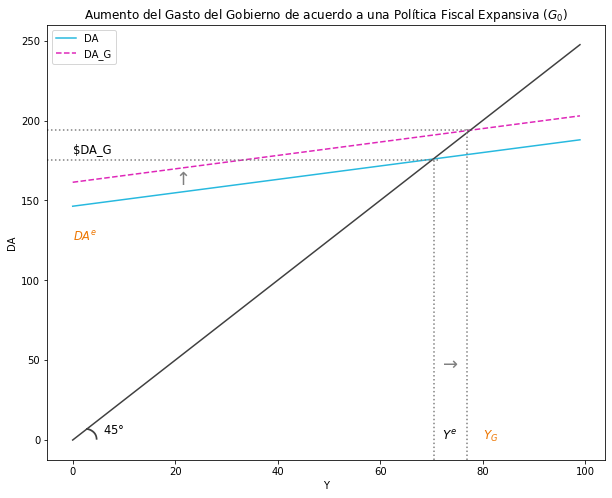

In [11]:
# Gráfico
y_max = np.max(DA_IS_K)
fig, ax = plt.subplots(figsize=(10, 8))


# Curvas a graficar
ax.plot(Y, DA_IS_K, label = "DA", color = "#27b9df") #curva ORIGINAL
ax.plot(Y, DA_G, label = "DA_G", color = "#df27b9", linestyle = 'dashed') #NUEVA curva
ax.plot(Y, L_45, color = "#404040") #línea de 45º

# Lineas punteadas
plt.axvline(x = 70.5, ymin= 0, ymax = 0.69, linestyle = ":", color = "grey")
plt.axhline(y = 175, xmin= 0, xmax = 0.7, linestyle = ":", color = "grey")
plt.axvline(x = 77,  ymin= 0, ymax = 0.76, linestyle = ":", color = "grey")
plt.axhline(y = 194, xmin= 0, xmax = 0.76, linestyle = ":", color = "grey")

# Texto agregado
plt.text(0, 180, '$DA_G', fontsize = 11.5, color = 'black')
plt.text(0, 125, '$DA^e$', fontsize = 11.5, color = '#EE7600')
plt.text(6, 4, '$45°$', fontsize = 11.5, color = 'black')
plt.text(2.5, -3, '$◝$', fontsize = 30, color = '#404040')
plt.text(72, 0, '$Y^e$', fontsize = 12, color = 'black')
plt.text(80, 0, '$Y_G$', fontsize = 12, color = '#EE7600')
plt.text(72, 45, '$→$', fontsize = 18, color = 'grey')
plt.text(20, 160, '$↑$', fontsize = 18, color = 'grey')

# Título y leyenda
ax.set(title = "Aumento del Gasto del Gobierno de acuerdo a una Política Fiscal Expansiva $(G_0)$", xlabel = r'Y', ylabel = r'DA')
ax.legend()

plt.show()

### 5.2 Política Fiscal Expansiva con una reducción de la Tasa de Tributación

### Intuición:

$$ t↓ → Co↑ → DA↑ → DA > Y → Y↑ $$
$$ t↓ → M↑ → DA↓ → DA < Y → Y↓ $$

Se entiende que si disminuye  la tasa de interés, el consumo también va aumentar (porque la tasa de interés en un factor importante al momento de analizar el ingreso disponible) y entonces el ingreso disponible también va aumentar y por ende también la demanda agregada. Si baja la tasa de interés, se va buscar importar más y entonces habría menos ingreso disponible y también menos demanda agregada. Sin embargo, en este caso, el consumo va pesar más porque es el que genera un mayor impacto en la economía dentro de un país. De todas maneras esto se puede comprobar matemáticamente. 

### Matemáticamente: $∆t < 0  →  ¿∆Y?$

In [12]:
Co, Io, Go, Xo, h, r, b, m, t = symbols('Co Io Go Xo h r b m t')

f = (Co + Io + Go + Xo - h*r)/(1-(b-m)*(1-t))


df_t = diff(f, t)
df_t #∆Y/∆t

(-b + m)*(Co + Go + Io + Xo - h*r)/(-(1 - t)*(b - m) + 1)**2

Considernado el diferencial de $∆t$:

$$ \frac{∆Y}{∆t} = \frac{(m-b)(Co + Go + Io + Xo - hr)}{(1-(1-t)(b-m)+1)^2} $$

- Sabiendo que b > m, entonces $(m-b) < 0$
- Los componentes del intercepto no cambian: $∆C_0 = ∆I_0 = ∆X_0 = ∆h = ∆r = 0$
- Cualquier número elevado al cuadrado será positivo: $ (1-(1-t)(b-m)+1)^2 > 0 $

Entonces:

$$ \frac{∆Y}{∆t} = \frac{(-)}{(+)} $$

Dado que $∆t < 0$, la división de dos positivos da otro positivo:

$$ \frac{∆Y}{(-)} = \frac{(-)}{(+)} $$

$$ ∆Y = \frac{(-)(-)}{(+)} $$

$$ ∆Y > 0 $$


### Gráfico:

In [13]:
#--------------------------------------------------
# Curva ORIGINAL

    # Parámetros
Y_size = 100 

Co = 35
Io = 40
Go = 70
Xo = 2
h = 0.7
b = 0.8
m = 0.2
t = 0.3 #tasa de tributación
r = 0.9

Y = np.arange(Y_size)

    # Ecuación 
def DA_P(Co, Io, Go, Xo, h, r, b, m, t, Y):
    DA_P = (Co + Io + Go + Xo - h*r) + ((b - m)*(1 - t)*Y)
    return DA_P

DA_IS_P = DA_P(Co, Io, Go, Xo, h, r, b, m, t, Y)


#--------------------------------------------------
# NUEVA curva 

    # Definir SOLO el parámetro cambiado
t = 0.01

# Generar la ecuación con el nuevo parámetros
def DA_P(Co, Io, Go, Xo, h, r, b, m, t, Y):
    DA_P = (Co + Io + Go + Xo - h*r) + ((b - m)*(1 - t)*Y)
    return DA_P

DA_t = DA_P(Co, Io, Go, Xo, h, r, b, m, t, Y)

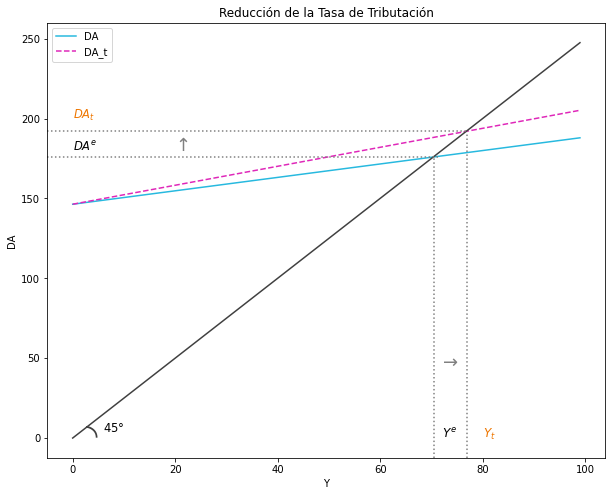

In [14]:
# Gráfico
y_max = np.max(DA_IS_P)
fig, ax = plt.subplots(figsize=(10, 8))


# Curvas a graficar
ax.plot(Y, DA_IS_P, label = "DA", color = "#27b9df") #curva ORIGINAL
ax.plot(Y, DA_t, label = "DA_t", color = "#df27b9", linestyle = 'dashed') #NUEVA curva
ax.plot(Y, L_45, color = "#404040") #línea de 45º

# Lineas punteadas
plt.axvline(x = 70.5, ymin= 0, ymax = 0.69, linestyle = ":", color = "grey")
plt.axhline(y = 176, xmin= 0, xmax = 0.7, linestyle = ":", color = "grey")
plt.axvline(x = 77,  ymin= 0, ymax = 0.75, linestyle = ":", color = "grey")
plt.axhline(y = 192, xmin= 0, xmax = 0.75, linestyle = ":", color = "grey")

# Texto agregado
plt.text(0, 180, '$DA^e$', fontsize = 11.5, color = 'black')
plt.text(0, 200, '$DA_t$', fontsize = 11.5, color = '#EE7600')
plt.text(6, 4, '$45°$', fontsize = 11.5, color = 'black')
plt.text(2.5, -3, '$◝$', fontsize = 30, color = '#404040')
plt.text(72, 0, '$Y^e$', fontsize = 12, color = 'black')
plt.text(80, 0, '$Y_t$', fontsize = 12, color = '#EE7600')
plt.text(72, 45, '$→$', fontsize = 18, color = 'grey')
plt.text(20, 180, '$↑$', fontsize = 18, color = 'grey')

# Título y leyenda
ax.set(title = "Reducción de la Tasa de Tributación", xlabel = r'Y', ylabel = r'DA')
ax.legend()

plt.show()

## 6 Estática Comparativa en el modelo de Ingreso-Gasto Keynesiano con Regla Contracíclica

### 6.1 Función DA y Recta de 45°

In [15]:
# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 70
g = 0.2 #solo valores entre 0-0.4
Xo = 2
h = 0.7
b = 0.8 # b > m
m = 0.2
t = 0.3
r = 0.9

Y = np.arange(Y_size)

# Ecuación de la curva del ingreso de equilibrio

def DA_C(Co, Io, Go, Xo, h, r, b, m, t, g, Y):
    DA_C = (Co  + Io + Go + Xo - h*r) + [(b-m)*(1-t)-g]*Y
    return DA_C

DA_Cont = DA_C(Co, Io, Go, Xo, h, r, b, m, t, g, Y)


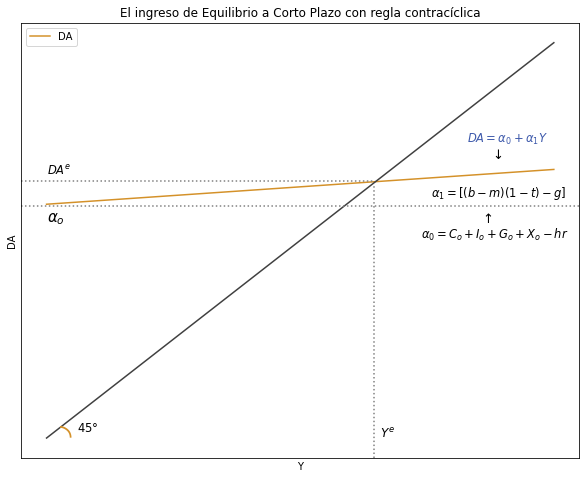

In [16]:
# Gráfico

# Dimensiones del gráfico
y_max = np.max(DA_Cont)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(DA_Cont, label = "DA", color = "#d49129") #Demanda agregada
ax.plot(L_45, color = "#404040") #Línea de 45º

# Eliminar las cantidades de los ejes
ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Líneas punteadas punto de equilibrio
plt.axvline(x=64,  ymin= 0, ymax= 0.63, linestyle = ":", color = "grey")
plt.axhline(y=161, xmin= 0, xmax= 0.63, linestyle = ":", color = "grey")
plt.axhline(y=145, xmin= 0, xmax= 1, linestyle = ":", color = "grey")

# Texto agregado
    # punto de equilibrio
plt.text(0, 165, '$DA^e$', fontsize = 11.5, color = 'black')
plt.text(65, 0, '$Y^e$', fontsize = 12, color = 'black')
plt.text(0, 135, '$α_o$', fontsize = 15, color = 'black')
    # línea 45º
plt.text(6, 4, '$45°$', fontsize = 11.5, color = 'black')
plt.text(2.5, -3, '$◝$', fontsize = 30, color = '#d49129')
    # ecuaciones
plt.text(82, 185, '$DA = α_0 + α_1 Y$', fontsize = 11.5, color = '#3D59AB')
plt.text(75, 151, '$α_1 = [(b-m)(1-t)-g]$', fontsize = 11.5, color = 'black')
plt.text(73, 125, '$α_0 = C_o + I_o + G_o + X_o - hr$', fontsize = 11.5, color = 'black')

plt.text(87, 175, '$↓$', fontsize = 13, color = 'black')
plt.text(85, 135, '$↑$', fontsize = 13, color = 'black')

# Título y leyenda
ax.set(title="El ingreso de Equilibrio a Corto Plazo con regla contracíclica", xlabel= r'Y', ylabel= r'DA')
ax.legend() #mostrar leyenda

plt.show()


### 6.2 Nivel de Ingreso de Equilibrio

Entonces sabiendo que la demanda agregada bajo una política fiscal con regla contracíclia es: 

$$ DA = C_0 + I_0 + G_0 + X_0 - hr + ((b - m)(1 - t)-g) $$


Considerando la condición de equilibrio $Y = DA$, la nuevaa ecuación del ingreso de equilibrio es:

$$ Y = C_0 + bY^d + I_0 -hr + G_0 + X_0 - mY^d $$

$$ Y = \frac{1}{1 - (b - m)(1 - t)+g} (C_0 + I_0 + G_0 + X_0 - hr) $$

### 6.3 Política Fiscal Expansiva con Aumento del Gasto del Gobierno

### Intuicion:

$$ Go↑ → DA↑ → DA > Y → Y↑ $$

### Matemáticamente: $∆Go < 0  →  ¿∆Y?$

$$ Y = \frac{1}{1 - (b - m)(1 - t)+g} (C_0 + I_0 + G_0 + X_0 - hr) $$

o, considerando el multiplicador keynesiano, $ k > 0 $:

$$ Y = k (C_0 + I_0 + G_0+ X_0 - hr) $$


$$ ∆Y = k (∆C_0 + ∆I_0 + ∆G_0 + ∆X_0 - ∆hr) $$

Pero, si no ha habido cambios en $C_0$, $I_0$, $X_0$, $h$ ni $r$, entonces: 

$$∆C_0 = ∆I_0 = ∆X_0 = ∆h = ∆r = 0$$

$$ ∆Y = k (∆G_0) $$

Sabiendo que $∆G_0 > 0 $ y que $k > 0$, la multiplicación de un número positivo con un positivo dará otro positivo:

$$ \frac{∆Y}{(+)} = (+)$$

$$ ∆Y = (+)(+) $$

$$ ∆Y > 0 $$

### Gráficos

In [17]:
#--------------------------------------------------
# Curva  ORIGINAL

    # Parámetros
Y_size = 100 

Co = 35
Io = 40
Go = 70
Xo = 2
h = 0.7
b = 0.8
m = 0.2
t = 0.3
r = 0.9
g = 0.2

Y = np.arange(Y_size)

    # Ecuación 
def DA_L(Co, Io, Go, Xo, h, r, b, m, t, Y, g):
    DA_L = (Co + Io + Go + Xo - h*r) + [(b - m)*(1 - t)-g]*Y
    return DA_L

DA_IS_L = DA_L(Co, Io, Go, Xo, h, r, b, m, t, Y, g)


#--------------------------------------------------
# NUEVA curva 

    # Definir SOLO el parámetro cambiado
Go = 85

# Generar la ecuación con el nuevo parámetro
def DA_L(Co, Io, Go, Xo, h, r, b, m, t, Y, g):
    DA_L = (Co + Io + Go + Xo - h*r) + [(b - m)*(1 - t)-g]*Y
    return DA_L

DA_IS_L_L = DA_L(Co, Io, Go, Xo, h, r, b, m, t, Y, g)

In [18]:
# Recta de 45°

a = 2.5 

def L_45(a, Y):
    L_45 = a*Y
    return L_45

L_45 = L_45(a, Y)

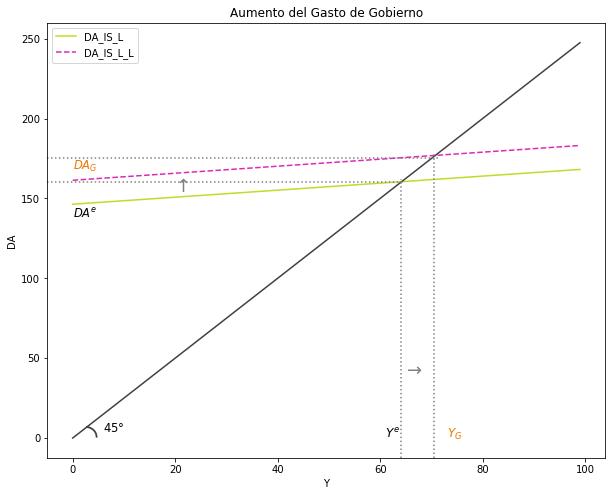

In [19]:
# Gráfico
y_max = np.max(DA_IS_L)
fig, ax = plt.subplots(figsize=(10, 8))


# Curvas a graficar
ax.plot(Y, DA_IS_L, label = "DA_IS_L", color = "#b9df27") #curva ORIGINAL
ax.plot(Y, DA_IS_L_L, label = "DA_IS_L_L", color = "#df27b9", linestyle = 'dashed') #NUEVA curva
ax.plot(Y, L_45, color = "#404040") #Línea de 45º

# Lineas punteadas
plt.axvline(x = 64, ymin= 0, ymax = 0.64, linestyle = ":", color = "grey")
plt.axhline(y = 160, xmin= 0, xmax = 0.64, linestyle = ":", color = "grey")
plt.axvline(x = 70.5,  ymin= 0, ymax = 0.70, linestyle = ":", color = "grey")
plt.axhline(y = 175, xmin= 0, xmax = 0.70, linestyle = ":", color = "grey")

# Texto agregado
plt.text(0, 138, '$DA^e$', fontsize = 11.5, color = 'black')
plt.text(0, 168, '$DA_G$', fontsize = 11.5, color = '#EE7600')
plt.text(6, 4, '$45°$', fontsize = 11.5, color = 'black')
plt.text(2.5, -3, '$◝$', fontsize = 30, color = '#404040')
plt.text(61, 0, '$Y^e$', fontsize = 12, color = 'black')
plt.text(73, 0, '$Y_G$', fontsize = 12, color = '#EE7600')
plt.text(65, 40, '$→$', fontsize = 18, color = 'grey')
plt.text(20, 154, '$↑$', fontsize = 18, color = 'grey')

# Título y leyenda
ax.set(title = "Aumento del Gasto de Gobierno", xlabel = r'Y', ylabel = r'DA')
ax.legend()

plt.show()


### 6.4 ¿Cuál es el papel que juega el parámetro 'g' en el multiplicador keynesiano?

De acuerdo a Félix Jiménez (2020), una política fiscal de gasto que opera con una regla contracíclica, como en el ejercicio anterior, afecta tanto la pendiente de la curva de la Demanda agregada así como al multiplicador keynesiano (pp. 68). En ambos casos va disminuir sus tamaños para así controlar las fluctuaciones del ingreso o del producto. 

### 6.5 ¿El tamaño del efecto de la política fiscal en el 6 es el mismo que en el apartado 5?

Considero que no porque a pesar de que se ven muy similares los efectos en los gráficos, se puede apreciar una inclinación en el gráfico 6 lo cuál significaría que la política expansiva contracíclia tiene un impacto en la demanda agregada que genera una reducción en la pendiente. Esto se debe a que el valor del multiplicador keynesiano  se ha reducido por la adición de  en el denominador. Entonces, si  es más pequeño, el impacto de una política fiscal expansiva  será menor cuando se utilice la regla contracíclica. De allí que la pendiente de la curva de la Demanda Agregada  sea menor en el apartado 6). En este sentido, se cumple lo que dice Jimenez (2020, pp. 64) en tanto una política fiscal expansiva contracíclica tiene una pendiente reducida, es decir, aumenta en menor medida la producción y por ende el ingreso, en comparación con la política fiscal expansiva del apartado 5. 

### 6.6 Reducción de exportaciones en una crisis mundial

### Intuitivo

$$ Xo↓ → X → DA↓ → DA < Y → Y↓$$

### Matemático: $$ΔXo < 0 → ¿ΔY?$$

Sabiendo que:
$$ Y = \frac{1}{1 - (b - m)(1 - t)+g} (C_0 + I_0 + G_0 + M - hr) $$

o, considerando el multiplicador keynesiano, $ k > 0 $:

$$ Y = k (C_0 + I_0 + G_0 + M - hr) $$


$$ ∆Y = k (∆C_0 + ∆I_0 + ∆G_0 + ∆M - ∆hr) $$

Pero, si no ha habido cambios en $C_0$, $G_0$, $I_0$, $M$, $h$ ni $r$, entonces: 

$$∆C_0 = ∆I_0 = ∆M = ∆h = ∆r = 0$$

$$ ∆Y = k (∆X_0) $$

Sabiendo que $∆X_0 < 0 $ y que $k > 0$, la multiplicación de un número negativo con un positivo dará otro negativo:

$$ ∆Y = (-)(+) $$
$$ ∆Y < 0 $$

### Gráfico:

In [20]:
# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 70
g = 0.2 #solo valores entre 0-0.4
Xo = 15
h = 0.7
b = 0.8 # b > m
m = 0.2
t = 0.3
r = 0.9

Y = np.arange(Y_size)

# Ecuación de la curva del ingreso de equilibrio

def DA_C(Co, Io, Go, Xo, h, r, b, m, t, g, Y):
    DA_C = (Co  + Io + Go + Xo - h*r) + [(b-m)*(1-t)-g]*Y
    return DA_C

DA_Cont = DA_C(Co, Io, Go, Xo, h, r, b, m, t, g, Y)


# Nueva curva

Xo = 1

def DA_C(Co, Io, Go, Xo, h, r, b, m, t, g, Y):
    DA_C = (Co  + Io + Go + Xo - h*r) + [(b-m)*(1-t)-g]*Y
    return DA_C

DA_C_X = DA_C(Co, Io, Go, Xo, h, r, b, m, t, g, Y)

In [21]:
# líneas punteadas autómaticas

    # definir la función line_intersection
def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
       raise Exception('lines do not intersect')

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y

    # coordenadas de las curvas (x,y)
A = [DA_Cont[0], Y[0]] # DA, coordenada inicio
B = [DA_Cont[-1], Y[-1]] # DA, coordenada fin

C = [L_45[0], Y[0]] # L_45, coordenada inicio
D = [L_45[-1], Y[-1]] # L_45, coordenada fin

    # creación de intersección

intersec = line_intersection((A, B), (C, D))
intersec # (y,x)

(174.7478070175439, 69.89912280701755)

In [22]:
 # coordenadas de las curvas (x,y)
A = [DA_C_X[0], Y[0]] # DA, coordenada inicio
B = [DA_C_X[-1], Y[-1]] # DA, coordenada fin

C = [L_45[0], Y[0]] # L_45, coordenada inicio
D = [L_45[-1], Y[-1]] # L_45, coordenada fin

    # creación de intersección

intersec_X = line_intersection((A, B), (C, D))
intersec_X # (y,x)

(159.39692982456143, 63.75877192982457)

In [23]:
# Gráfico
y_max = np.max(DA_Cont)
fig, ax = plt.subplots(figsize=(10, 8))


# Curvas a graficar
ax.plot(DA_Cont, label = "DA", color = "#3D59AB") #curva ORIGINAL
ax.plot(DA_C_X, label = "DA_X", color = "#9129d4", linestyle = 'dashed') #NUEVA curva
ax.plot(L_45, color = "#404040") #línea de 45º

# Lineas punteadas
plt.axhline(y=intersec[0], xmin= 0, xmax= 0.68, linestyle = ":", color = "grey")
plt.axvline(x=intersec[1], ymin= 0, ymax= 0.68, linestyle = ":", color = "grey")

plt.axhline(y=intersec_X[0], xmin= 0, xmax= 0.63, linestyle = ":", color = "grey")
plt.axvline(x=intersec_X[1], ymin= 0, ymax= 0.63, linestyle = ":", color = "grey")


# Texto agregado
plt.text(0, 180, '$DA^e$', fontsize = 11.5, color = 'black')
plt.text(0, 135, '$DA_X$', fontsize = 11.5, color = '#EE7600')
plt.text(6, 4, '$45°$', fontsize = 11.5, color = 'black')
plt.text(2.5, -3, '$◝$', fontsize = 30, color = '#404040')
plt.text(71, 0, '$Y^e$', fontsize = 12, color = 'black')
plt.text(60, 0, '$Y_X$', fontsize = 12, color = '#EE7600')
plt.text(65.5, 45, '$←$', fontsize = 15, color = 'grey')
plt.text(20, 154, '$↓$', fontsize = 15, color = 'grey')

# Título y leyenda
ax.set(title = "Reducción de las Exportaciones", xlabel = r'Y', ylabel = r'DA')
ax.legend()

plt.show()


## Parte 2: Reporte

De la lectura se puede identificar que la pregunta de investigación del artículo de Dancourt trata sobre cuáles fueron las causas y efectos recesivos e inflacionarios del shock externo negativo en la economía peruana producida por el proceso de ‘vacas flacas’ (entendida como recesiones donde decrece la actividad económica y el ingreso disponible) durante los años 2014-15. De la misma manera, y a partir del análisis anterior, concluye cuáles serán los retos macroeconómicos del nuevo gobierno de PPK y las posibles medidas a tomar. 

Respecto a las fortalezas, la diversidad de ejemplos y datos estadísticos del Banco Central de Reserva ayudaron para entender mucho mejor los procesos económicos como la caída de los precios de las materias primas y el subempleo, y como estas se relacionaron con los periodos de las ‘vacas flacas’. En este sentido, permitieron entender e identificar mejor los patrones que desencadenaron crisis económicas en el país a través de su historia, así mismo como las medidas que han sido tomadas y que han perjudicado o beneficiado al crecimiento económico. Por esta razón es que luego podemos apreciar como el autor es capaz de predecir que en el gobierno de PPK será una economía paralizada que deberá tomar las medidas necesarias para evitar continuar este proceso de ‘vacas gordas’ a ‘vacas flacas’. Continuando en esta misma línea, el enfoque keynesiano, que pone énfasis en el papel del Estado y como su intervención en la economía a través del gasto público es esencial, y el choque de la realidad de que el Perú es una economía que es fuertemente afectada por fuerzas externas, tanto por nuestro sistema bancario dolarizado así como por la especulación de los inversiones, nos permite entender el porqué de nuestra historia económica así como las posibles formas de poder combatirlas a través de políticas monetarias y fiscales que muevan la economía urbana y empresarial.

Por otro lado, una de las debilidades sería como no hay un análisis socioeconómico y/o político que pueda acompañar cada uno de los casos. Esto se debe principalmente por el hecho de que se ha empleado en este artículo un método experimental que está buscando encontrar las generalidades a partir de las múltiples políticas económicas implementadas entre el 2013-2015 y sus efectos. Esto es positivo en tanto nos permite orientarnos mejor sobre cuáles políticas funcionan y cuáles no, pero al utilizar este enfoque no logramos capturar las particularidades de cada contexto y las posibles variables externas que también pudieron jugar un rol importante. Sin embargo, a pesar de ello, no se puede negar la importancia de este artículo y la contribución que ofrece al poder identificar distintos procesos en la historia macroeconómica del Perú (‘vacas gordas’ y ‘vacas flacas’) así como la capacidad de predicción a partir del estudio de previas políticas que han fallado, como fue la estrategia de aumentar la tasa de interés y reducir en el gasto público, cuando al final solo logró acentuar las crisis financieras, y de políticas que pueden ayudar a dinamizar la economía a partir de la reducción de la tasa de interés el aumento del gasto público. Asimismo, contribuyó muchísimo con su enfoque keynesiano que permitió presentar políticas fiscales a corto y largo plazo que necesitarán de la intervención del Estado, pero no de una manera intrusiva, sino una que permitirá la constante inserción de dinero por parte del mismo Estado mediante el gasto público, por parte de inversionistas, a través de la diversificación de la economía en distintos sectores y al solucionar el problema entre la inflación real y la especulativa. 

Y finalmente, gracias a las contribuciones de Dancourt se puede continuar esta conversación agregándole distintos matices. Particularmente la idea de la diversificación que menciona Dancourt, sobre la cual el economista Barrientos (2017) menciona que de hecho sí es la influencia (que es demasiada), precios y demanda que tienen los productos de exportación sobre la economía del Perú. No obstante, al ser un ‘paper’ escrito años después es que describe que, de hecho, si bien existe un plan tangible de ejecución de este modelo, es que no existe una convicción latente en los agentes involucrados en el proceso. Lo cual puede tener explicación en el hecho de que se trata de un proceso de transformación estructural, por lo tanto, teniendo una explicación más de corte sistemático. Y donde particularmente es la política un factor constitutivo en este proceso, donde es el Estado aquel que debe por llamarlo, “llevar la batuta” para que haya éxito, si esta duda o no se encuentra totalmente convencida es que desbarata el sistema completo. De la misma manera, Rodriguez Gómez (2021) apoya esta idea en tanto los factores internos juegan un papel importante en la variabilidad del crecimiento económico. En este sentido, Dancourt hace un muy buen análisis del impacto de factores externos en la economía peruana como la presión del sistema bancario dolarizado así como la especulación de los inversionistas, pero también debemos ir tomando en cuenta los factores domésticos como la política y la cultura social que jugarán definitivamente un rol importante en la intensificación o disminución de las crisis económicas. 
